# LAB 2: Mandatory Assignments
Author: Aliprandi Francesco

In [21]:
from utils import read_data, firing_rate_model, plot_1, plot_2_0, plot_2_1

import matplotlib.pyplot as plt 
import numpy as np

In [22]:
path = "data/lab2_1_data.csv"
u = read_data(path)

print(f"Dataset shape: {u.shape}")

Dataset shape: (2, 100)


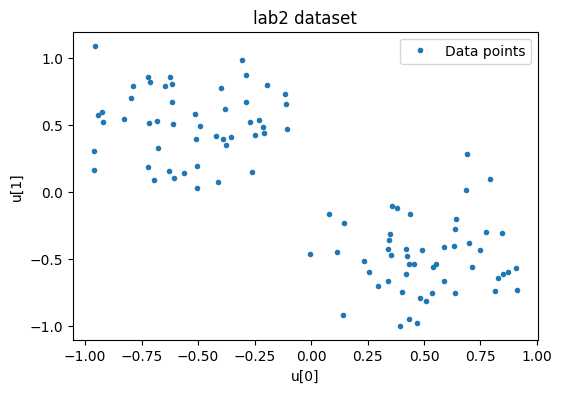

In [23]:
plt.figure(figsize=(6,4))
plt.plot(u[0], u[1], "o", markersize=3, label="Data points")
plt.xlabel("u[0]")
plt.ylabel("u[1]")
plt.title("lab2 dataset")
plt.legend()

plt.show()

### Assignment 1: Basic Hebbian Learning

In [24]:
epochs = 1000   
lr = 0.01
delta = 0.0001
     
w, w_history, convergence = firing_rate_model("hebb", u, epochs, lr, delta, seed=42)

Running epoch  100
Running epoch  200
Running epoch  300
Running epoch  400
Running epoch  500
Running epoch  600
Running epoch  700
Running epoch  800
Running epoch  900
Running epoch  1000


In [25]:
q = np.cov(u)
eval, evec = np.linalg.eig(q)
p_evec = evec.T[np.argmax(eval)]

print(f"Correlation Matrix: \n{q}")
print(f"\nPrincipal eigenvector of input correlation matrix: {p_evec}")


Correlation Matrix: 
[[ 0.3297068  -0.26166261]
 [-0.26166261  0.32491515]]

Principal eigenvector of input correlation matrix: [ 0.71033647 -0.70386228]


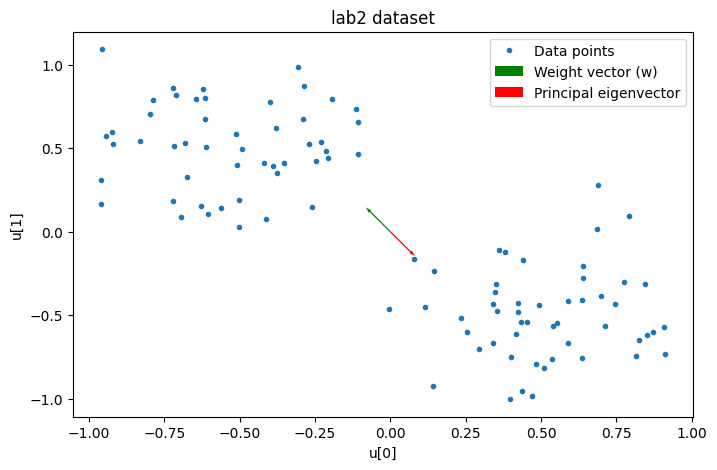

In [26]:
plot_1(u, w, p_evec)

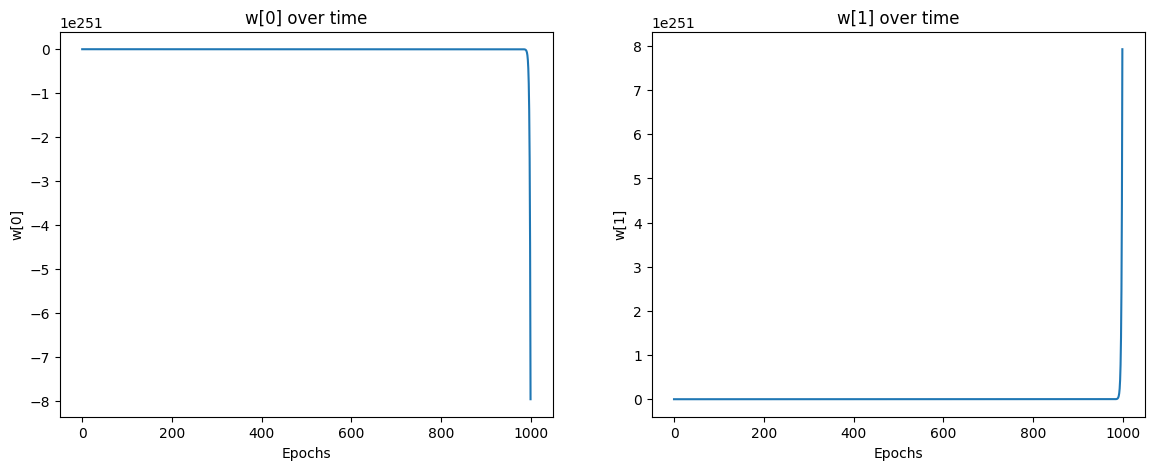

In [27]:
tspan = np.arange(0, convergence, 1)
plot_2_0(tspan, w_history)

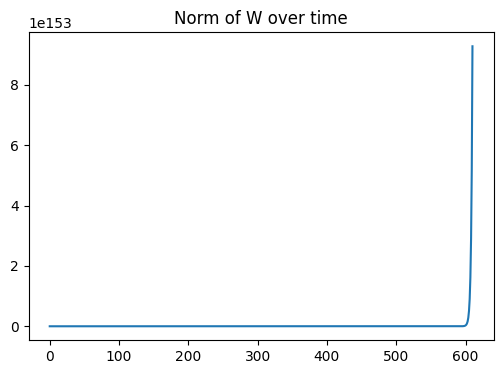

In [28]:
plot_2_1(tspan, w_history, epochs)

Nota: the plot ends at iteration n. 600 because norm of weight vector become infinit

### Assignment 2: Oja rule

In [29]:
epochs = 1000   
lr = 0.001
delta = 0.000001
alpha = 0.01
     
w, w_history, convergence = firing_rate_model("oja", u, epochs, lr, delta, alpha, seed=42)

Running epoch  100
Running epoch  200
Convergence reach at epoch 226


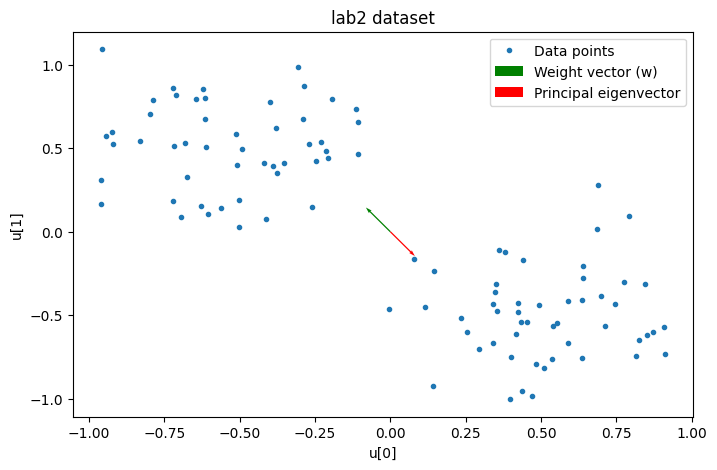

In [30]:
plot_1(u, w, p_evec)

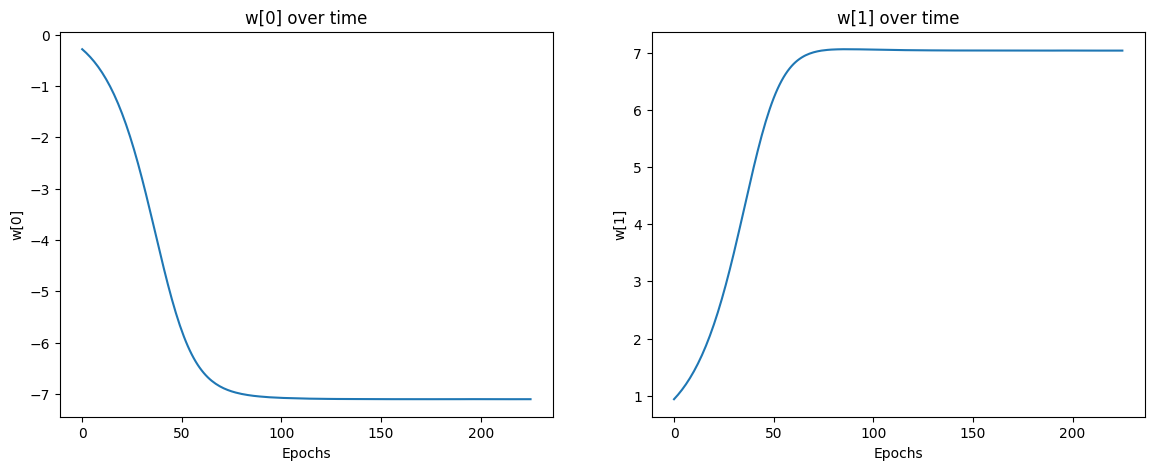

In [31]:
tspan = np.arange(0, convergence, 1)
plot_2_0(tspan, w_history)

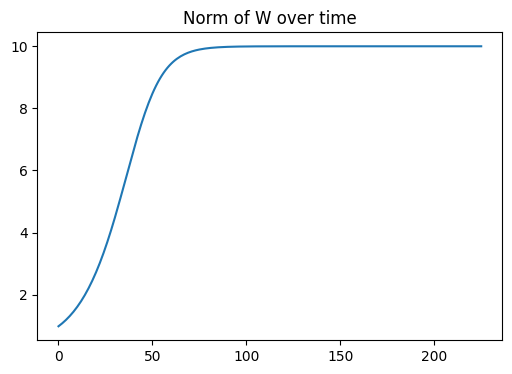

In [32]:
plot_2_1(tspan, w_history, convergence)

### Assignment 3: Subtractive Normalization

In [33]:
epochs = 1000  
lr = 0.01
delta = 0.0001
     
w, w_history, convergence = firing_rate_model("sub-norm", u, epochs, lr, delta, seed=42)

Running epoch  100
Running epoch  200
Running epoch  300
Running epoch  400
Running epoch  500
Running epoch  600
Running epoch  700
Running epoch  800
Running epoch  900
Running epoch  1000


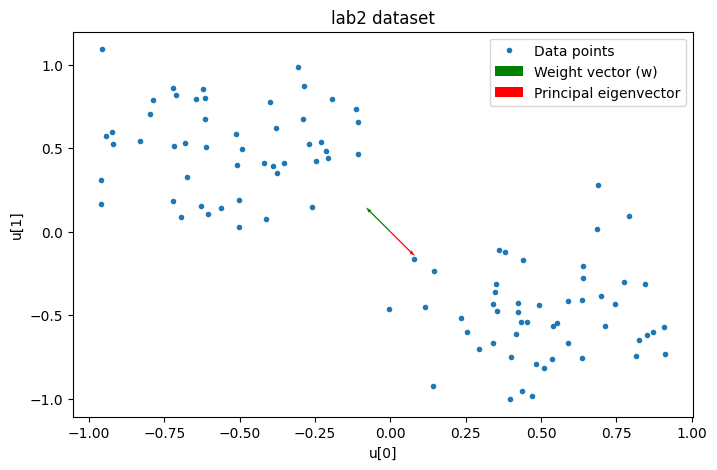

In [34]:
plot_1(u, w, p_evec)

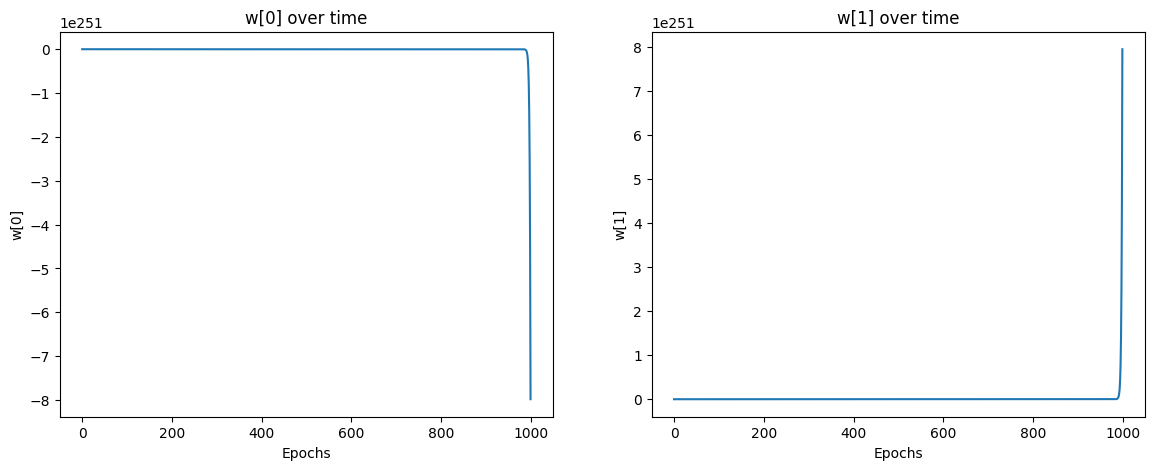

In [35]:
tspan = np.arange(0, convergence, 1)
plot_2_0(tspan, w_history)

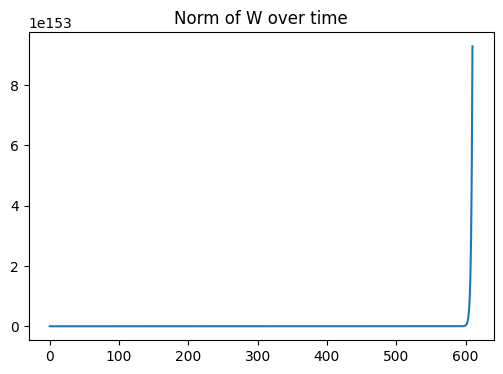

In [36]:
plot_2_1(tspan, w_history, convergence)

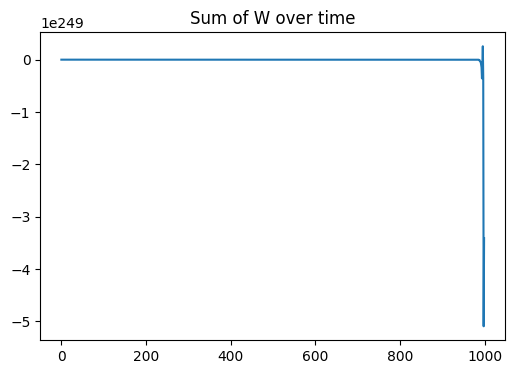

In [37]:
sum_hist = np.zeros(convergence)
for i,w in enumerate(w_history):
    sum_hist[i] = w[0] + w[1]
    
plt.figure(figsize=(6,4))
plt.plot(tspan, sum_hist)
plt.title("Sum of W over time")
plt.show()

In [38]:
sum_hist

array([ 6.94098110e-001,  7.41607019e-001,  7.68676104e-001,
        8.10360991e-001,  7.75148903e-001,  7.61572712e-001,
        5.56923914e-001,  1.38061792e-001, -2.54870976e-001,
       -1.32615441e+000, -3.44233034e+000, -9.05296642e+000,
       -1.14627970e+001, -1.87638210e+001, -4.18971647e+001,
       -1.29972289e+002, -1.17177402e+002, -1.21725523e+002,
       -3.67905514e+002, -9.11208474e+002, -1.01301505e+003,
       -1.32658020e+003, -1.44708036e+003, -4.97836167e+003,
       -4.79750757e+003, -1.25920484e+004, -3.54904671e+004,
        1.22424722e+004, -2.07743469e+004, -2.47232977e+005,
       -4.05650352e+005, -3.15305198e+005, -1.71654702e+006,
       -1.83883044e+006, -8.82411237e+005, -2.61203354e+005,
       -8.90550743e+006, -7.90866073e+006, -3.77347045e+007,
       -3.30356733e+007, -6.40492644e+007, -1.24609321e+008,
       -4.00281938e+008, -5.04240792e+008, -4.70817400e+008,
       -1.93649937e+009, -3.00501390e+009, -8.80040446e+009,
       -1.75483131e+010,

In [39]:
w_history

array([[-6.80372617e-001,  1.37447073e+000],
       [-1.46259944e+000,  2.20420646e+000],
       [-2.89170151e+000,  3.66037761e+000],
       ...,
       [-2.49578596e+251,  2.49231287e+251],
       [-4.48264302e+251,  4.43171277e+251],
       [-7.98265141e+251,  7.94854440e+251]])

In [40]:
n = np.ones(u.shape[0])
nu = u.shape[1]
v = 0.5
x = [3,6]
nu = 0.5

((v*(n@x))*n)/nu

array([9., 9.])